In [ ]:
# Reading cleaned dataset
import pandas as pd
path = '/content/drive/My Drive/BE PROJECT/Lawgical Final/LabelledDataset/'
df = pd.read_csv(path+'cleaned_dataset_new.csv')

In [ ]:
# Splitting the dataset into train and test sets
X = df.loc[:,'Judgement'].values
y = df.loc[:,'label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weighting = compute_class_weight(class_weight='balanced' ,classes=[0,1], y= y) 

In [ ]:
print(weighting)

[1.21714286 0.84860558]


In [ ]:
# Vectorizinf the corpus using TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features=10000) 
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(1192, 10000) (512, 10000)


In [ ]:
#logistic regression as suggested by sklearn
#scaling inputvectors using maxabsscaler
from sklearn import preprocessing
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_mabs= max_abs_scaler.fit_transform(train_vectors)
X_test_mabs= max_abs_scaler.transform(test_vectors)

In [ ]:
#using a standard scaler with mean=false (this is done in ordder for it to allow a sparse matrix as input, as train_vectors is a sparse matrix)
std_scaler=preprocessing.StandardScaler(with_mean=False)
X_train_std = std_scaler.fit_transform(train_vectors)
X_test_std = std_scaler.transform(test_vectors)

In [ ]:
! pip install -q scikit-plot

In [ ]:
from  sklearn.metrics  import accuracy_score
from  sklearn.metrics  import recall_score
from  sklearn.metrics  import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import scikitplot as skplt

Accuracy Score =  0.69140625
Recall Score =  0.9044368600682594
Precision Score =  0.6708860759493671


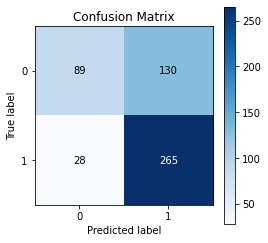

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_vectors, y_train)

predicted = lr.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.728515625
Recall Score =  0.825938566552901
Precision Score =  0.7333333333333333
F1 score =  0.7768860353130015
Classification Report: 
               precision    recall  f1-score   support

     class 0       0.72      0.60      0.65       219
     class 1       0.73      0.83      0.78       293

    accuracy                           0.73       512
   macro avg       0.73      0.71      0.72       512
weighted avg       0.73      0.73      0.72       512



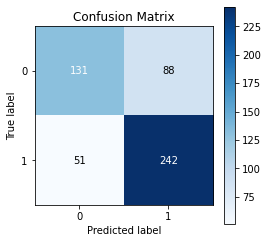

In [ ]:
#using maxabs scaler
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_mabs, y_train)

predicted = lr.predict(X_test_mabs)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print('F1 score = ', f1_score(y_test, predicted))
print('Classification Report: \n', classification_report(y_test, predicted, target_names= ['class 0', 'class 1']))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [ ]:
#VISUALIZATION TOP FEATURES EACH CLASS
print(len(lr.coef_[0]))
print(type(lr.coef_[0]))
print(type(lr.intercept_))
print(len(lr.intercept_))
print(lr.intercept_)
import numpy as np
arr = lr.coef_[0]
sortedarr=np.sort(arr)
import pandas as pd
topfeatures = pd.DataFrame({'coef_0': arr , 'features': vectorizer.get_feature_names()})
sortedfeatures = topfeatures.sort_values(by='coef_0')
print('label 1 features')
print(sortedfeatures.tail(10))
print('label 0 features')
print(sortedfeatures.head(10))
# print(sortedfeatures.tail(10))

10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
[0.85590132]
label 1 features
        coef_0            features
8095  0.525761              result
7586  0.527323             quashed
4195  0.541785           forthwith
8189  0.547240  rule make absolute
8648  0.559412         shall leave
5462  0.633128                like
4526  0.647985              hereby
5583  0.670814       make absolute
1405  0.811288               aside
8603  0.815812           set aside
label 0 features
        coef_0          features
4889 -0.651168      instant case
2666 -0.601249        contention
6837 -0.582906  petition dismiss
4082 -0.556477        find merit
1187 -0.514061         applicant
2597 -0.502527     consider view
1987 -0.495967      case involve
8996 -0.494025   submission make
599  -0.463647        acceptable
5332 -0.463590   learn applicant
        coef_0            features
8095  0.525761              result
7586  0.527323             quashed
4195  0.541785           forthwith
8189  0.5

Accuracy Score =  0.728515625
Recall Score =  0.825938566552901
Precision Score =  0.7333333333333333
F1 score =  0.7768860353130015
Classification Report: 
               precision    recall  f1-score   support

     class 0       0.72      0.60      0.65       219
     class 1       0.73      0.83      0.78       293

    accuracy                           0.73       512
   macro avg       0.73      0.71      0.72       512
weighted avg       0.73      0.73      0.72       512



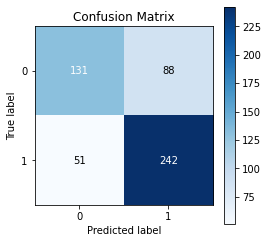

In [ ]:
#using maxabs scaler
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_mabs, y_train)

predicted = lr.predict(X_test_mabs)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print('F1 score = ', f1_score(y_test, predicted))
print('Classification Report: \n', classification_report(y_test, predicted, target_names= ['class 0', 'class 1']))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score





Accuracy Score =  0.77734375
Recall Score =  0.8498293515358362
Precision Score =  0.780564263322884
F1 score =  0.8137254901960784
Classification Report: 
               precision    recall  f1-score   support

     class 0       0.77      0.68      0.72       219
     class 1       0.78      0.85      0.81       293

    accuracy                           0.78       512
   macro avg       0.78      0.77      0.77       512
weighted avg       0.78      0.78      0.78       512



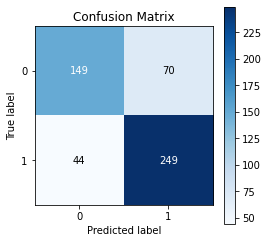

In [ ]:
#using maxabs scaler with liblinear and penalty l1
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',penalty= 'l1')
lr.fit(X_train_mabs, y_train)

predicted = lr.predict(X_test_mabs)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print('F1 score = ', f1_score(y_test, predicted))
print('Classification Report: \n', classification_report(y_test, predicted, target_names= ['class 0', 'class 1']))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))


In [ ]:
#using standard scaler increasing max iterations
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)
lr.fit(X_train_std, y_train)

predicted = lr.predict(X_test_std)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

#issues with this possible overfitting
#Standard scaler doesnt suit for sparse matrix

NameError: ignored

Accuracy Score =  0.67578125
Recall Score =  0.7235494880546075
Precision Score =  0.7138047138047138


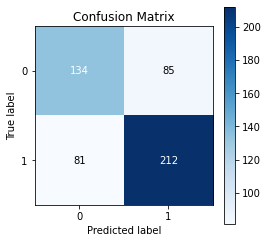

In [ ]:
#class weight balanced
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(train_vectors, y_train)

predicted = lr.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.779296875
Recall Score =  0.8532423208191127
Precision Score =  0.78125
ROC AUC score=  0.7668038088113828
ROC AUC no skill :  0.5
cutoff threshold [2 1 0]


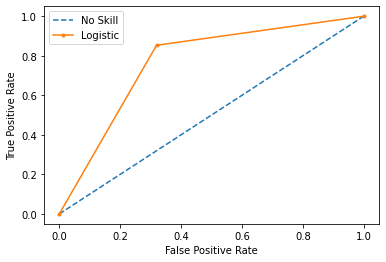

In [ ]:
#ROC-AUC Curve for MAXABS normalized vectors solver= liblinear
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train_mabs, y_train)

predicted = lr.predict(X_test_mabs)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print('ROC AUC score= ' , roc_auc_score(y_test,predicted))
ns_prob = [1 for _ in range(len(y_test))]
print('ROC AUC no skill : ' ,roc_auc_score(y_test, ns_prob))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, predicted , drop_intermediate= True)
print('cutoff threshold', threshold)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy Score =  0.69140625
Recall Score =  0.9044368600682594
Precision Score =  0.6708860759493671
ROC AUC score=  0.6554147770660932
ROC AUC no skill :  0.5
cutoff threshold [2 1 0]


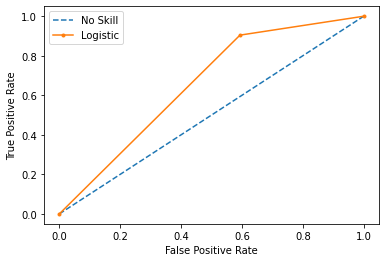

In [ ]:
#ROC-AUC Curve for tfidf 10000 vectors
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_vectors, y_train)

predicted = lr.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print('ROC AUC score= ' , roc_auc_score(y_test,predicted))
ns_prob = [1 for _ in range(len(y_test))]
print('ROC AUC no skill : ' ,roc_auc_score(y_test, ns_prob))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, predicted , drop_intermediate= True)
print('cutoff threshold', threshold)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

(1534, 10000) (170, 10000)
Accuracy Score =  0.711764705882353
Recall Score =  0.87
Precision Score =  0.7073170731707317
ROC AUC score=  0.6778571428571429
ROC AUC no skill :  0.5
cutoff threshold [2 1 0]


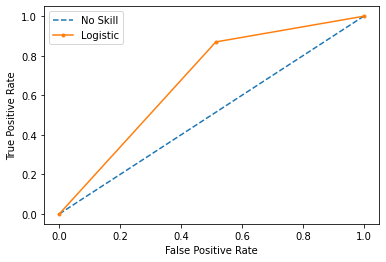

In [ ]:
#Stratified Kfold Validation
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=52)
# define model
lr = LogisticRegression()

for train_index, test_index in cv.split(X, y):
  X_train, y_train = X[train_index], y[train_index]
  X_test, y_test = X[test_index], y[test_index]

# Vectorizinf the corpus using TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features=10000) 
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(train_vectors, y_train)

predicted = lr.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print('ROC AUC score= ' , roc_auc_score(y_test,predicted))
ns_prob = [1 for _ in range(len(y_test))]
print('ROC AUC no skill : ' ,roc_auc_score(y_test, ns_prob))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, predicted , drop_intermediate= True)
print('cutoff threshold', threshold)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(X_train)
x_validation_tfidf = tvec.transform(X_test)
chi2score = chi2(x_train_tfidf, y_train)[0]



In [ ]:
import pandas as pd
Chiscore= pd.DataFrame({'chiscore': chi2score, 'feature': tvec.get_feature_names()})

Text(0.5, 0, '$\\chi^2$')

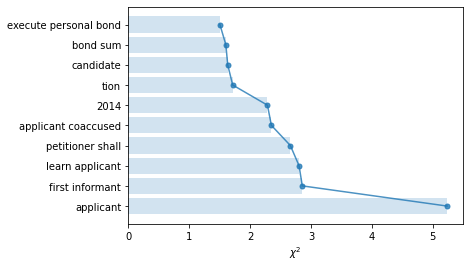

In [ ]:
topchi=Chiscore.sort_values(by='chiscore', ascending=False).head(10)

x = range(10)
labels = list(topchi['feature'])
plt.barh(x,topchi['chiscore'], align='center', alpha=0.2)
plt.plot(topchi['chiscore'], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

(1534, 2233132) (170, 2233132)
(1534, 100000) (170, 100000)
Accuracy Score =  0.6588235294117647
Recall Score =  0.9
Precision Score =  0.6521739130434783
F1 score =  0.7563025210084033
Classification Report: 
               precision    recall  f1-score   support

     class 0       0.69      0.31      0.43        70
     class 1       0.65      0.90      0.76       100

    accuracy                           0.66       170
   macro avg       0.67      0.61      0.59       170
weighted avg       0.67      0.66      0.62       170



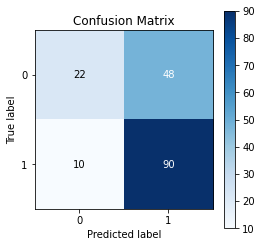

In [ ]:
# Vectorizing the corpus using TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,3)) 
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

#selecting 100000 best features using chi2 
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []
ch2 = SelectKBest(chi2, k=100000)
x = ch2.fit_transform(vectorizer.transform(X), y)
x_train_chi2_selected = ch2.transform(train_vectors)
x_validation_chi2_selected = ch2.transform(test_vectors)
print(x_train_chi2_selected.shape, x_validation_chi2_selected.shape)


#using chi square for feature selectiona and liblinear and penalty l1
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(x_train_chi2_selected, y_train)

predicted = lr.predict(x_validation_chi2_selected)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print('F1 score = ', f1_score(y_test, predicted))
print('Classification Report: \n', classification_report(y_test, predicted, target_names= ['class 0', 'class 1']))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))




Accuracy Score =  0.81640625
Recall Score =  0.9658703071672355
Precision Score =  0.771117166212534


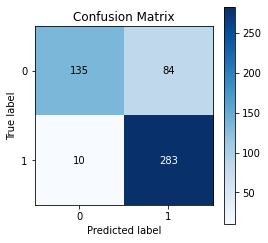

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclf=RandomForestClassifier(random_state= 52, bootstrap=False, max_features='auto', n_estimators=1000,class_weight='balanced_subsample')
rfclf.fit(x_train_chi2_selected, y_train)

predicted=rfclf.predict(x_validation_chi2_selected)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

TypeError: ignored